Afegir en el train, files del nivell 'second'

In [50]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Tornem a carregar el primer nivell

In [51]:
odor = pd.read_json('Data/odor_prop.json', lines=False, orient='records')
odor=odor[odor['level']=='first']
odor.reset_index(drop=True, inplace=True)
mol=odor['cid'].value_counts()
mols=mol.index[mol>1]
groups=[]
for i in range(len(odor)):
    for mol in mols:
        if odor['cid'][i] == mol:
            g=np.max(odor[odor['cid']==mol]['label'])
            groups.append([mol, g])
            ls_drop=[]
for mol in groups:
    for i in range(len(odor)):
        if (odor['cid'][i] == mol[0]):
            if odor['label'][i]!=mol[1]:
                ls_drop.append(i)
odor=odor.drop(ls_drop)
odor.reset_index(drop=True, inplace=True)
odor = odor.sort_values(by='cid')
odor.reset_index(inplace=True)
ls_repeat=[]
for i in range(len(odor)-1):
    if (odor['cid'][i]==odor['cid'][i+1]):
        ls_repeat.append(i)
odor=odor.drop(ls_repeat)
odor.reset_index(drop=True, inplace=True)
odor

,index,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,2210,fruity,first,49,4,CC(C)C(=O)C(=O)O,54.37,0.29610,116.116,116.047344,...,None,None,None,None,None,None,None,None,None,None
1,3245,caramellic,first,58,5,CCC(=O)C(=O)O,54.37,0.05010,102.089,102.031694,...,None,None,None,None,None,None,None,None,None,None
2,2054,fruity,first,70,4,CC(C)CC(=O)C(=O)O,54.37,0.68620,130.143,130.062994,...,None,None,None,None,None,None,None,None,None,None
3,1034,phenolic,first,72,6,C1=CC(=C(C=C1C(=O)O)O)O,77.76,0.79600,154.121,154.026609,...,None,None,None,None,None,None,None,None,None,None
4,2696,fatty,first,107,4,C1=CC=C(C=C1)CCC(=O)O,37.30,1.70380,150.177,150.068080,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,3232,caramellic,first,90479169,5,CCOC(=O)C1=C(OC(=C1O)C)C,59.67,1.77874,184.191,184.073559,...,None,None,None,None,None,None,None,None,None,None
3384,2784,fatty,first,92043681,4,CCCCCCCCCC(=O)CC(=O)O.CC(CO)[O-],97.66,1.89840,289.392,289.202048,...,None,None,None,None,None,None,None,None,None,None
3385,2783,fatty,first,92256353,4,CC(=O)CC[C@H]1C(=C)CCCC1(C)C,17.07,3.73810,194.318,194.167065,...,None,None,None,None,None,None,None,None,None,None
3386,1863,fruity,first,101306697,4,C[C@@H]1CC[C@H]([C@]12CCC(=CC2)C)C(C)(C)O,20.23,3.92000,222.372,222.198365,...,None,None,None,None,None,None,None,None,None,None


In [52]:
ind_X=odor.columns[6:59]
X = odor[ind_X]
y = odor['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) 
# Poso una proporció de test tant alta, perquè després afegirem files al train, i així compensa.

In [53]:
odor = pd.read_json('Data/odor_prop.json', lines=False, orient='records')
odor=odor[odor['level']=='second']
odor.reset_index(drop=True, inplace=True)
mol=odor['cid'].value_counts()
mols=mol.index[mol>1]
groups=[]
for i in range(len(odor)):
    for mol in mols:
        if odor['cid'][i] == mol:
            g=np.max(odor[odor['cid']==mol]['label'])
            groups.append([mol, g])
            ls_drop=[]
for mol in groups:
    for i in range(len(odor)):
        if (odor['cid'][i] == mol[0]):
            if odor['label'][i]!=mol[1]:
                ls_drop.append(i)
odor=odor.drop(ls_drop)
odor.reset_index(drop=True, inplace=True)
odor = odor.sort_values(by='cid')
odor.reset_index(inplace=True)
ls_repeat=[]
for i in range(len(odor)-1):
    if (odor['cid'][i]==odor['cid'][i+1]):
        ls_repeat.append(i)
odor=odor.drop(ls_repeat)
odor.reset_index(drop=True, inplace=True)
odor

,index,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,2661,balsamic,second,72,0,C1=CC(=C(C=C1C(=O)O)O)O,77.76,0.7960,154.121,154.026609,...,None,None,None,None,None,None,None,None,None,None
1,713,rose,second,107,2,C1=CC=C(C=C1)CCC(=O)O,37.30,1.7038,150.177,150.068080,...,None,None,None,None,None,None,None,None,None,None
2,688,savory,second,119,0,C(CC(=O)O)CN,63.32,-0.1901,103.121,103.063329,...,None,None,None,None,None,None,None,None,None,None
3,2760,almond,second,125,2,C1=CC(=CC=C1CO)O,40.46,0.8845,124.139,124.052429,...,None,None,None,None,None,None,None,None,None,None
4,2757,almond,second,126,2,C1=CC(=CC=C1C=O)O,37.30,1.2047,122.123,122.036779,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,2708,amber,second,73555318,5,C[C@@H]1CC[C@@H]2[C@@]13CC(C2(C)C)C4(C(C3)OC(O...,18.46,4.3789,278.436,278.224580,...,None,None,None,None,None,None,None,None,None,None
2777,386,waxy,second,88168807,6,CC(C)CCCOC(=O)CCC(C)C,26.30,3.4020,200.322,200.177630,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Carboxylic acid esters Monocarboxylic acids a...,Aliphatic acyclic compounds,Fatty acid ester Carboxylic acid ester Monoca...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,
2778,320,woody,second,90266236,2,CCC(C(C)C)OC(=O)/C=C/C,26.30,2.5403,170.252,170.130680,...,None,None,None,None,None,None,None,None,None,None
2779,2195,earthy,second,92256353,7,CC(=O)CC[C@H]1C(=C)CCCC1(C)C,17.07,3.7381,194.318,194.167065,...,None,None,None,None,None,None,None,None,None,None


Tenir en compte que aií tindrem més train uqe el definit en la funció, però ja m'està bé:

In [54]:
X_train_add = odor[ind_X]
y_train_add = odor['label']

In [55]:
X_train_ = pd.concat([X_train_add, X_train])
y_train_ = pd.concat([y_train_add, y_train])

/home/lmc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


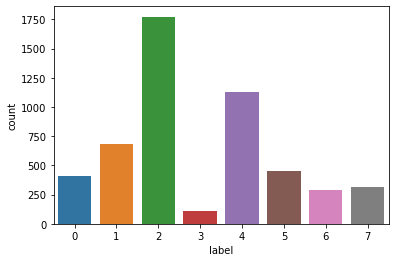

In [46]:
sns.countplot(y_train_)

/home/lmc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


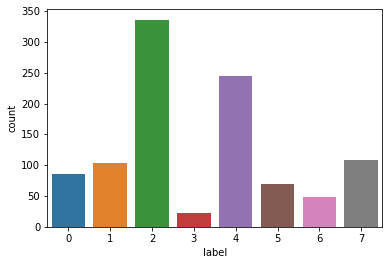

In [47]:
sns.countplot(y_test)

In [56]:
#Proporció nova train y test:
n = len(y_test)+len(y_train_)
print("Proporció de train:", len(y_train_)/n)
print("Proporció de test:", len(y_test)/n)

Proporció de train: 0.7254011995461177
Proporció de test: 0.2745988004538823


In [57]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis(),
    make_pipeline(StandardScaler(), SVC(gamma='auto')),
    svm.SVC()
    ]

# Logging for Visual Comparison


for clf in classifiers:
    clf.fit(X_train_, y_train_)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
      
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 25.9150%
DecisionTreeClassifier
****Results****
Accuracy: 28.0992%
RandomForestClassifier
****Results****
Accuracy: 31.9953%
LinearDiscriminantAnalysis
****Results****
Accuracy: 44.3329%
Pipeline
****Results****
Accuracy: 41.1452%
SVC
****Results****
Accuracy: 33.4711%
